In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("/Users/rohith/Documents/Datasets/Tesla_Stock_prices/Tesla_Stock.csv")

In [3]:
print(df)

            date    close      volume      open      high       low
0     2018/05/11  301.060   4665321.0  307.7000  308.8800  299.0800
1     2018/05/10  305.020   5642771.0  307.4997  312.9900  304.1119
2     2018/05/09  306.850   5712255.0  300.4100  307.0100  300.0500
3     2018/05/08  301.970   5927447.0  300.7950  307.7500  299.0000
4     2018/05/07  302.770   8673090.0  297.5000  305.9588  295.1700
5     2018/05/04  294.090   8565506.0  283.0000  296.8600  279.5200
6     2018/05/03  284.450  17339090.0  278.7900  288.0400  275.2300
7     2018/05/02  301.150   8346176.0  298.5700  306.8500  297.7844
8     2018/05/01  299.920   4614946.0  293.5100  300.8200  293.2200
9     2018/04/30  293.900   4224068.0  293.6100  298.7300  292.5000
10    2018/04/27  294.075   4346854.0  285.3700  294.4700  283.8300
11    2018/04/26  285.480   4348108.0  278.7500  285.7900  276.5000
12    2018/04/25  280.690   4000421.0  283.5000  285.1600  277.2500
13    2018/04/24  283.460   5678242.0  285.0000 

In [8]:
rows = df.values.tolist()
rows.reverse()

In [16]:
from sklearn.model_selection import train_test_split
x_train = []
y_train = []
x_test = []
y_test = []
X = []
Y = []
for row in rows:
    X.append(int(''.join(row[0].split('/'))))
    Y.append(row[3])
x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=0.9,test_size=0.1)

In [17]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [24]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [63]:
from sklearn.linear_model import LinearRegression 

clf_lr = LinearRegression()
clf_lr.fit(x_train,y_train)
y_pred_lr = clf_lr.predict(x_test)

In [64]:
from sklearn.svm import SVR


clf_svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
clf_svr.fit(x_train,y_train)
y_pred_svr = clf_svr.predict(x_test)

In [65]:
from sklearn.ensemble import RandomForestRegressor

clf_rf = RandomForestRegressor(n_estimators=100)
clf_rf.fit(x_train,y_train)
y_pred_rf = clf_rf.predict(x_test)

In [66]:
from sklearn.ensemble import GradientBoostingRegressor

clf_gb = GradientBoostingRegressor(n_estimators=200)
clf_gb.fit(x_train,y_train)
y_pred_gb = clf_gb.predict(x_test)

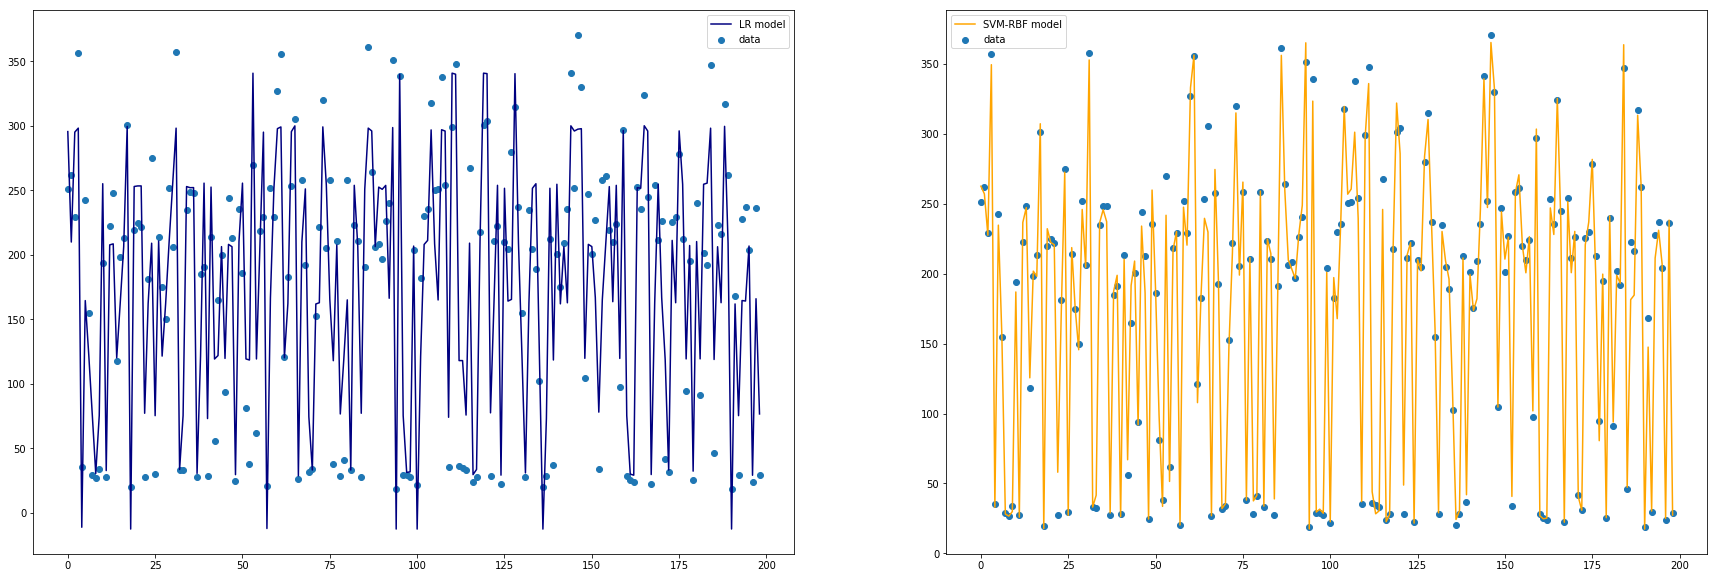

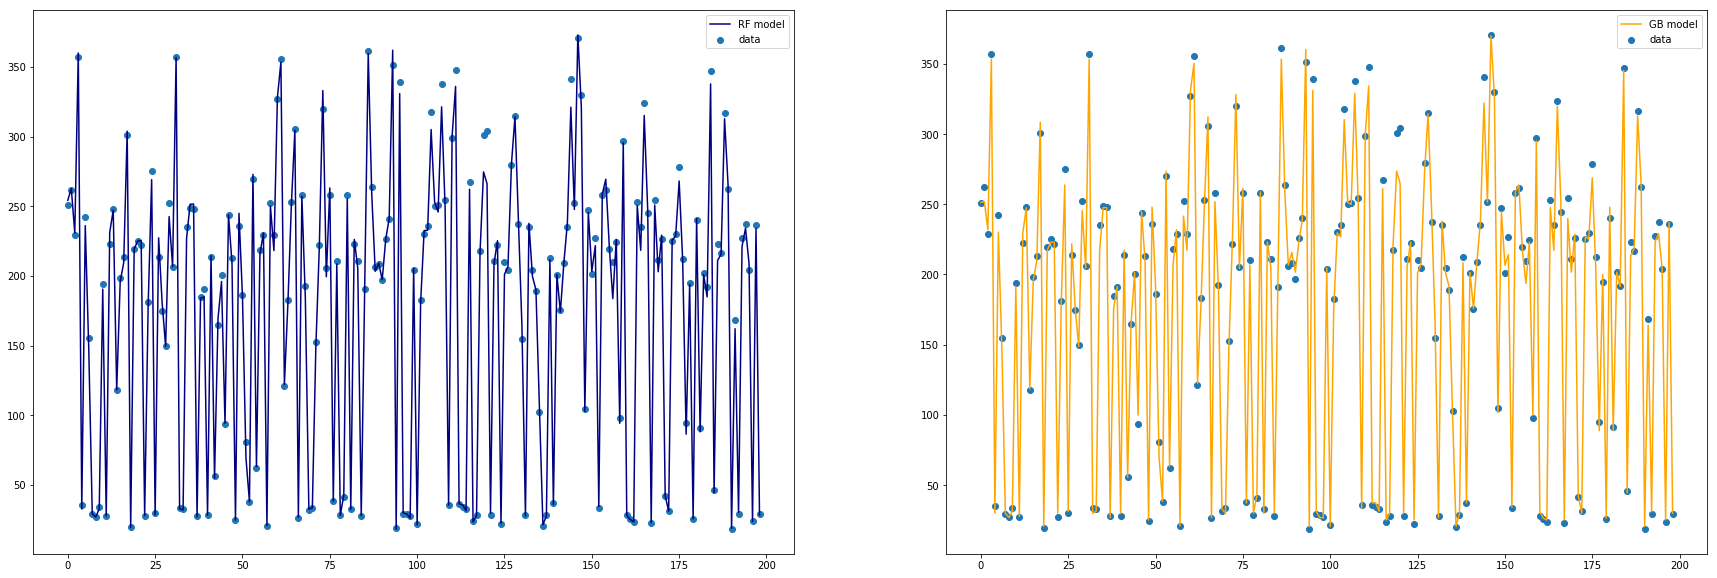

In [68]:
import matplotlib.pyplot as plt 

f,(ax1,ax2) = plt.subplots(1,2,figsize=(30,10))

ax1.scatter(range(len(y_test)),y_test,label='data')
ax1.plot(range(len(y_test)),y_pred_lr,color='navy',label='LR model')
ax1.legend()



ax2.scatter(range(len(y_test)),y_test,label='data')
ax2.plot(range(len(y_test)),y_pred_svr,color='orange',label='SVM-RBF model')
ax2.legend()



f1,(ax3,ax4) = plt.subplots(1,2,figsize=(30,10))

ax3.scatter(range(len(y_test)),y_test,label='data')
ax3.plot(range(len(y_test)),y_pred_rf,color='navy',label='RF model')
ax3.legend()



ax4.scatter(range(len(y_test)),y_test,label='data')
ax4.plot(range(len(y_test)),y_pred_gb,color='orange',label='GB model')
ax4.legend()


In [73]:
print("Accuracy of Linear Regerssion Model:",clf_lr.score(x_test,y_test))
print("Accuracy of SVM-RBF Model:",clf_svr.score(x_test,y_test))
print("Accuracy of Random Forest Model:",clf_rf.score(x_test,y_test))
print("Accuracy of Gradient Boosting Model:",clf_gb.score(x_test,y_test))

('Accuracy of Linear Regerssion Model:', 0.81006550370268104)
('Accuracy of SVM-RBF Model:', 0.9870405742286994)
('Accuracy of Random Forest Model:', 0.99660461141876577)
('Accuracy of Gradient Boosting Model:', 0.99621183670912183)
